In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from kaggle.api.kaggle_api_extended import KaggleApi
import os

api = KaggleApi()
api.authenticate()

print("✅ Autenticación exitosa para el usuario:", api.config_values['username'])


✅ Autenticación exitosa para el usuario: juandavidflrezobando


In [ ]:
import zipfile

os.makedirs("./data", exist_ok=True)
# Inicializar la API
api = KaggleApi()
api.authenticate()

# Descargar datos de la competencia
competition = "udea-ai-4-eng-20252-pruebas-saber-pro-colombia"
zip_path = f"./data/{competition}.zip"

api.competition_download_files(competition, path="./data")

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("./data")


In [4]:
train = pd.read_csv("./data/train.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [4]:
train.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [7]:
print("\n🔹 Valores nulos por columna:")
print(train.isnull().sum())


🔹 Valores nulos por columna:
ID                                 0
PERIODO_ACADEMICO                  0
E_PRGM_ACADEMICO                   0
E_PRGM_DEPARTAMENTO                0
E_VALORMATRICULAUNIVERSIDAD     6287
E_HORASSEMANATRABAJA           30857
F_ESTRATOVIVIENDA              32137
F_TIENEINTERNET                26629
F_EDUCACIONPADRE               23178
F_TIENELAVADORA                39773
F_TIENEAUTOMOVIL               43623
E_PRIVADO_LIBERTAD                 0
E_PAGOMATRICULAPROPIO           6498
F_TIENECOMPUTADOR              38103
F_TIENEINTERNET.1              26629
F_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                 0
INDICADOR_1                        0
INDICADOR_2                        0
INDICADOR_3                        0
INDICADOR_4                        0
dtype: int64


In [8]:
print("\n🔹 Porcentaje de nulos por columna:")
print(round(train.isnull().mean()*100, 2))


🔹 Porcentaje de nulos por columna:
ID                             0.00
PERIODO_ACADEMICO              0.00
E_PRGM_ACADEMICO               0.00
E_PRGM_DEPARTAMENTO            0.00
E_VALORMATRICULAUNIVERSIDAD    0.91
E_HORASSEMANATRABAJA           4.46
F_ESTRATOVIVIENDA              4.64
F_TIENEINTERNET                3.85
F_EDUCACIONPADRE               3.35
F_TIENELAVADORA                5.74
F_TIENEAUTOMOVIL               6.30
E_PRIVADO_LIBERTAD             0.00
E_PAGOMATRICULAPROPIO          0.94
F_TIENECOMPUTADOR              5.50
F_TIENEINTERNET.1              3.85
F_EDUCACIONMADRE               3.42
RENDIMIENTO_GLOBAL             0.00
INDICADOR_1                    0.00
INDICADOR_2                    0.00
INDICADOR_3                    0.00
INDICADOR_4                    0.00
dtype: float64


In [9]:
train['RENDIMIENTO_GLOBAL'].value_counts()

RENDIMIENTO_GLOBAL
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64

In [10]:
num_cols = train.select_dtypes(include=['int64','float64']).columns

print("\n🔹 Estadísticas descriptivas:")
print(train[num_cols].drop(columns=['ID','PERIODO_ACADEMICO']).describe().T)


🔹 Estadísticas descriptivas:
                count      mean       std  min    25%    50%    75%    max
INDICADOR_1  692500.0  0.268629  0.122130  0.0  0.203  0.240  0.314  0.657
INDICADOR_2  692500.0  0.259996  0.093480  0.0  0.212  0.271  0.309  0.487
INDICADOR_3  692500.0  0.262087  0.058862  0.0  0.254  0.276  0.293  0.320
INDICADOR_4  692500.0  0.262903  0.067944  0.0  0.255  0.285  0.303  0.332


In [27]:
# Ajustar estilo
sns.set(style="whitegrid")


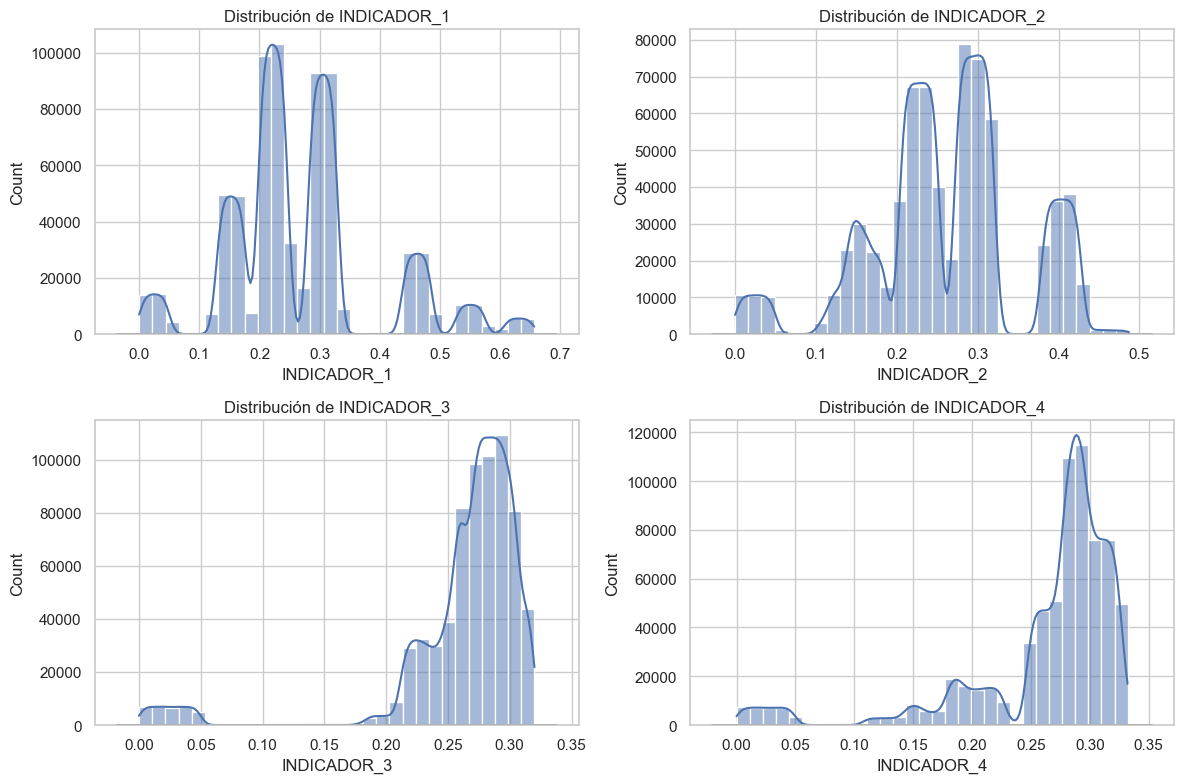

In [17]:
# Histograma para cada variable numérica
# =========================
# Definir las columnas numéricas sin ID y PERIODO_ACADEMICO
cols = [c for c in train[num_cols].columns if c not in ['ID','PERIODO_ACADEMICO']]

# Crear figura de cuadrantes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # aplanar para iterar fácilmente

for ax, col in zip(axes, cols):
    sns.histplot(train[col], bins=30, kde=True, ax=ax)
    sns.kdeplot(train[col], bw_adjust=1.5, color="black", ax=ax)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

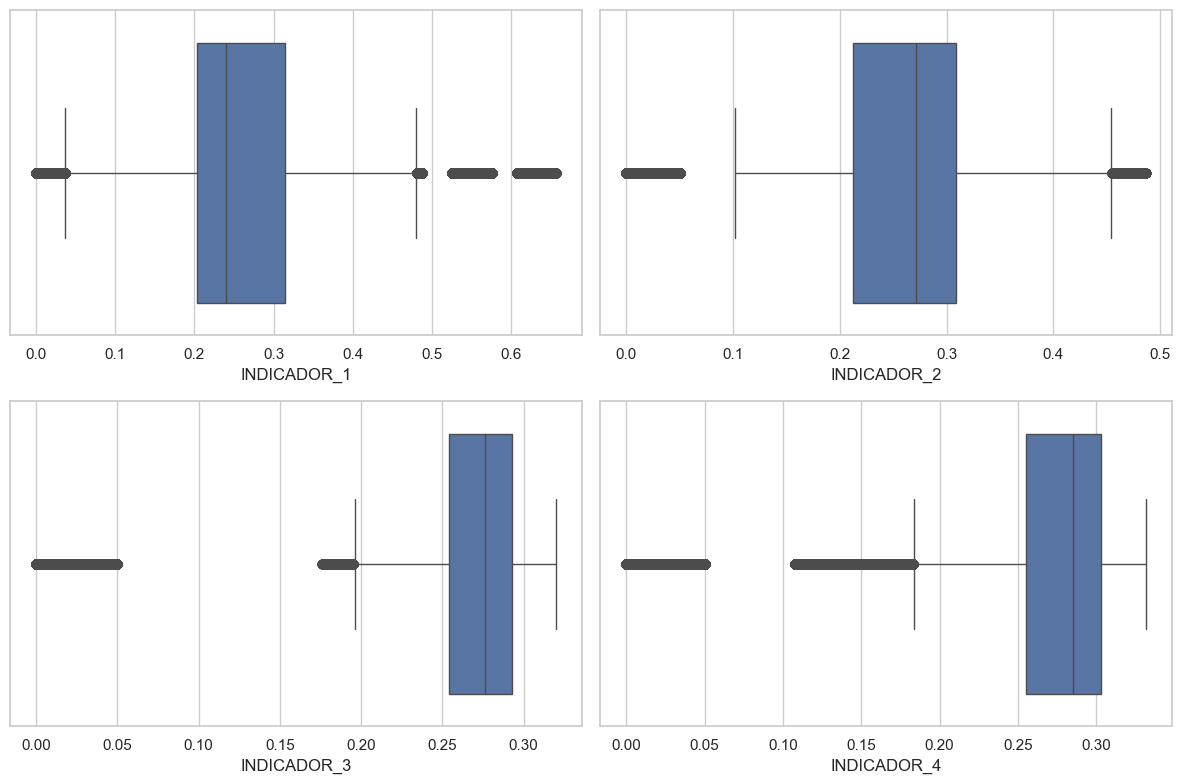

In [28]:
# Boxplot de variables numéricas (detección de outliers)
# =========================
# Crear figura de cuadrantes
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # aplanar para iterar fácilmente

for ax, col in zip(axes, cols):
    sns.boxplot(x=train[col], ax=ax)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# Conteo de categorías (para variables categóricas)
# =========================
for col in categoricas:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categorías en {col}")
    plt.xticks(rotation=45)
    plt.show()

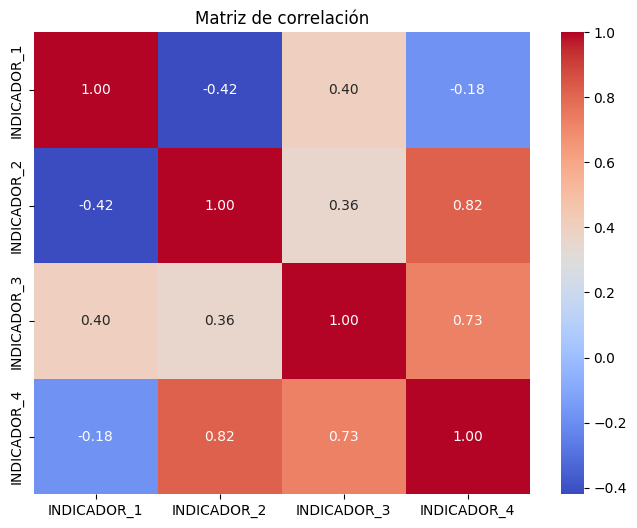

In [14]:
# Matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(train[num_cols].drop(columns=['ID','PERIODO_ACADEMICO']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


🔹 Variables categóricas: ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']

🔹 Distribución de E_PRGM_ACADEMICO:
E_PRGM_ACADEMICO
DERECHO                       0.076887
ADMINISTRACION DE EMPRESAS    0.074949
CONTADURIA PUBLICA            0.057277
PSICOLOGIA                    0.046111
INGENIERIA INDUSTRIAL         0.041128
ADMINISTRACIÓN DE EMPRESAS    0.035779
INGENIERIA CIVIL              0.028140
MEDICINA                      0.026136
PSICOLOGÍA                    0.025093
INGENIERIA DE SISTEMAS        0.024765
Name: proportion, dtype: float64


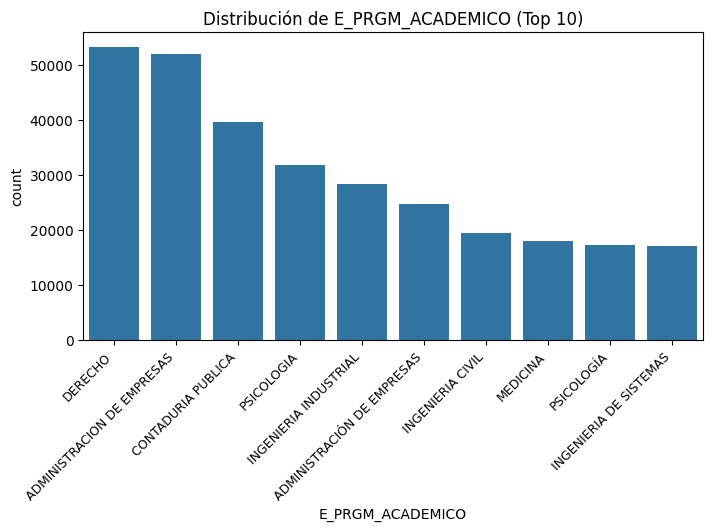


🔹 Distribución de E_PRGM_DEPARTAMENTO:
E_PRGM_DEPARTAMENTO
BOGOTÁ             0.407450
ANTIOQUIA          0.120732
VALLE              0.064387
ATLANTICO          0.059235
SANTANDER          0.041629
NORTE SANTANDER    0.032618
BOLIVAR            0.029789
BOYACA             0.020286
CUNDINAMARCA       0.020243
NARIÑO             0.019428
Name: proportion, dtype: float64


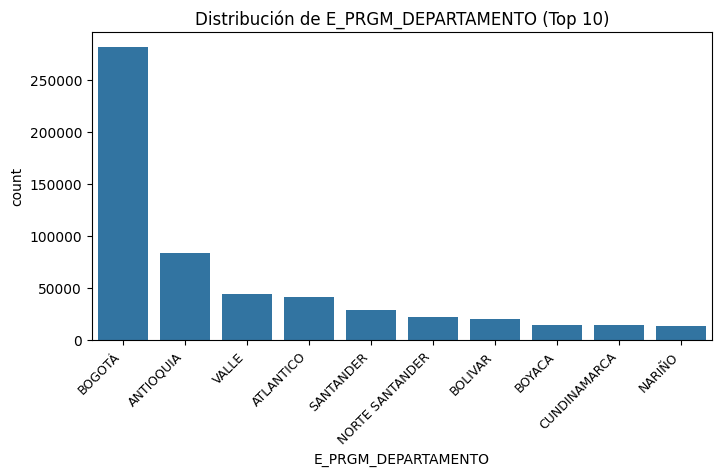


🔹 Distribución de E_VALORMATRICULAUNIVERSIDAD:
E_VALORMATRICULAUNIVERSIDAD
Entre 1 millón y menos de 2.5 millones      0.297354
Entre 2.5 millones y menos de 4 millones    0.185700
Menos de 500 mil                            0.116965
Entre 500 mil y menos de 1 millón           0.114693
Entre 4 millones y menos de 5.5 millones    0.101624
Más de 7 millones                           0.099115
Entre 5.5 millones y menos de 7 millones    0.056090
No pagó matrícula                           0.028458
Name: proportion, dtype: float64


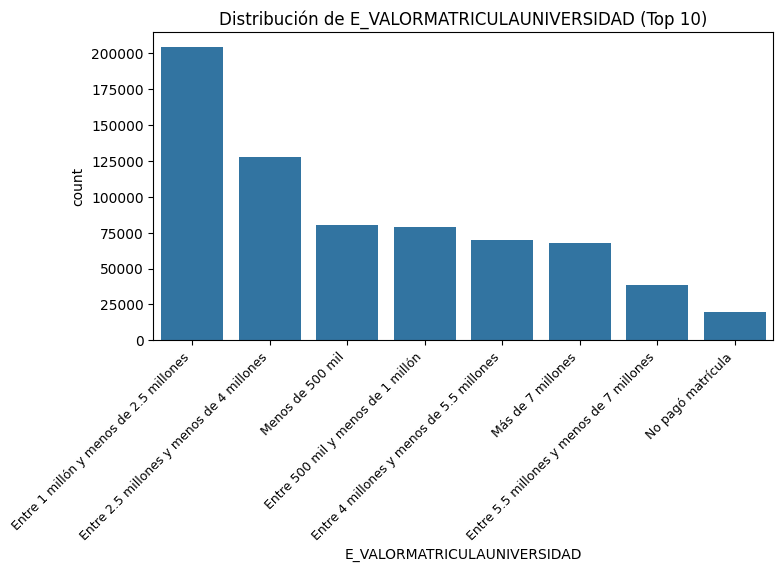


🔹 Distribución de E_HORASSEMANATRABAJA:
E_HORASSEMANATRABAJA
Más de 30 horas        0.376868
0                      0.176152
Entre 11 y 20 horas    0.175105
Entre 21 y 30 horas    0.140095
Menos de 10 horas      0.131780
Name: proportion, dtype: float64


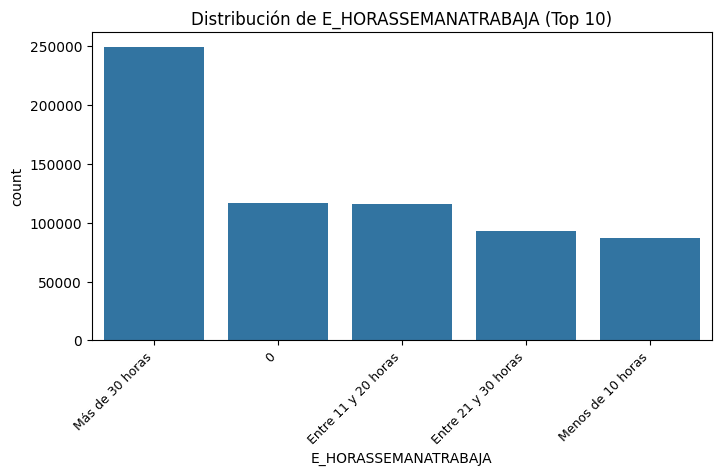


🔹 Distribución de F_ESTRATOVIVIENDA:
F_ESTRATOVIVIENDA
Estrato 2      0.352338
Estrato 3      0.319044
Estrato 1      0.169590
Estrato 4      0.099209
Estrato 5      0.035750
Estrato 6      0.019088
Sin Estrato    0.004981
Name: proportion, dtype: float64


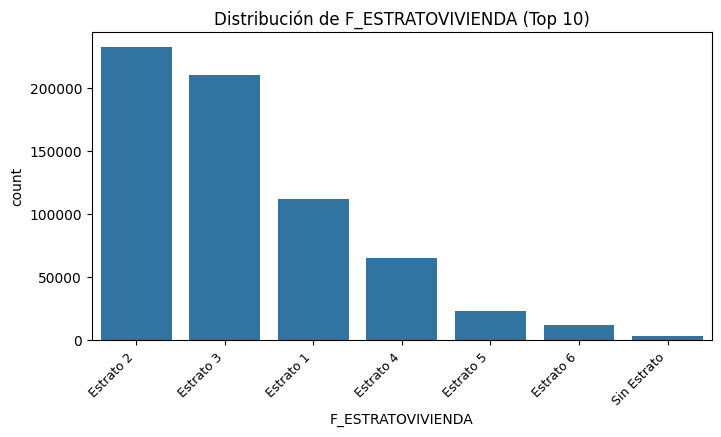

In [15]:
cat_cols = train.select_dtypes(include=['object']).columns
print("\n🔹 Variables categóricas:", list(cat_cols))

for col in cat_cols[:5]:  # Muestra primeras 5 para no saturar
    print(f"\n🔹 Distribución de {col}:")
    print(train[col].value_counts(normalize=True).head(10))

    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index[:10])
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.title(f"Distribución de {col} (Top 10)")
    plt.show()

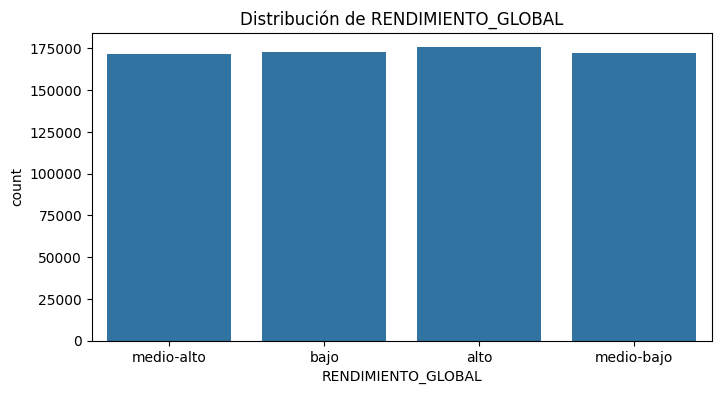

In [16]:
if "RENDIMIENTO_GLOBAL" in train.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train, x="RENDIMIENTO_GLOBAL")
    plt.title("Distribución de RENDIMIENTO_GLOBAL")
    plt.show()

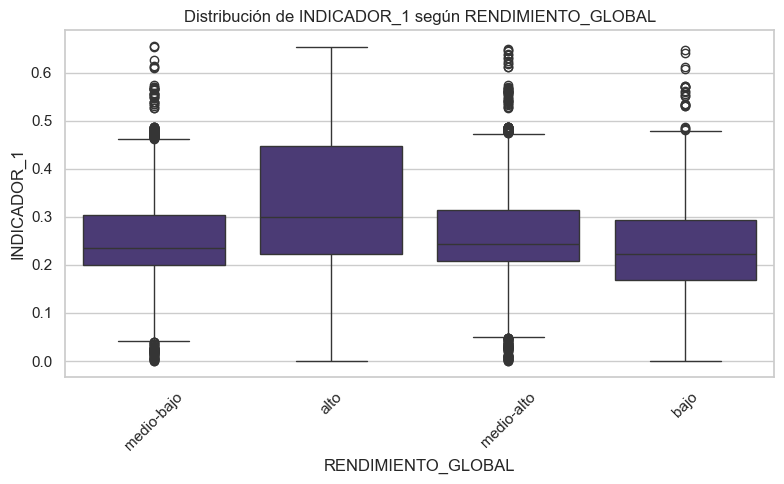

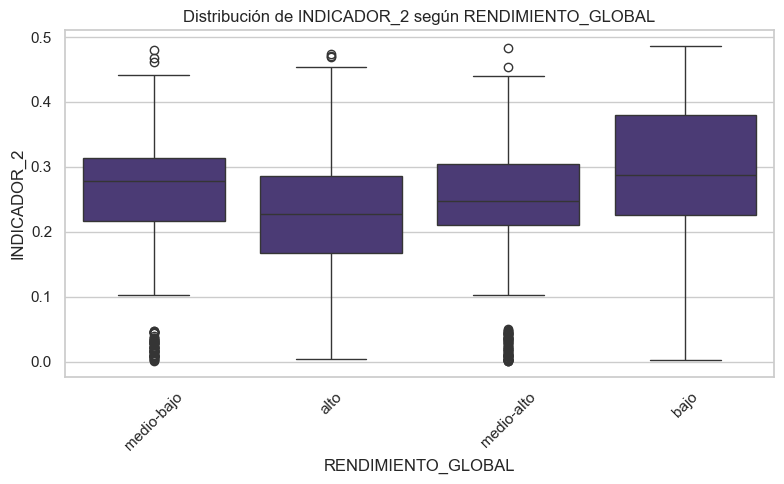

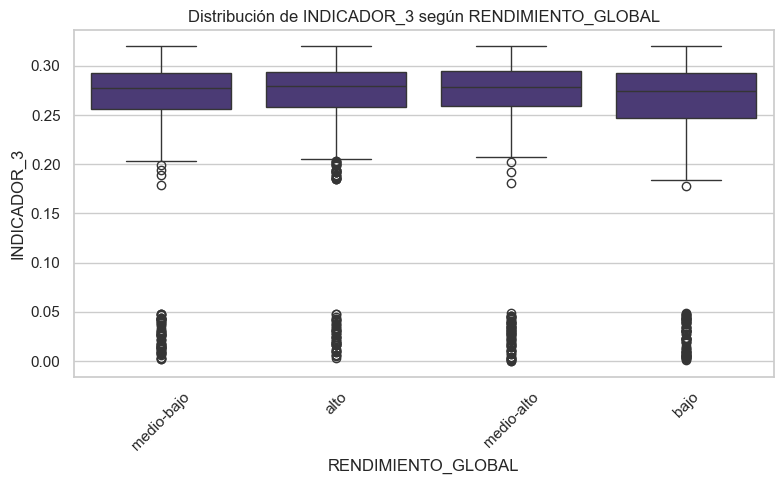

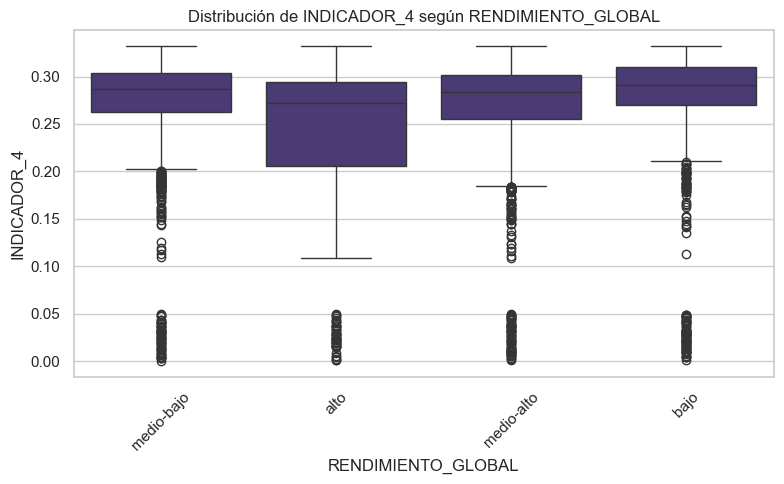

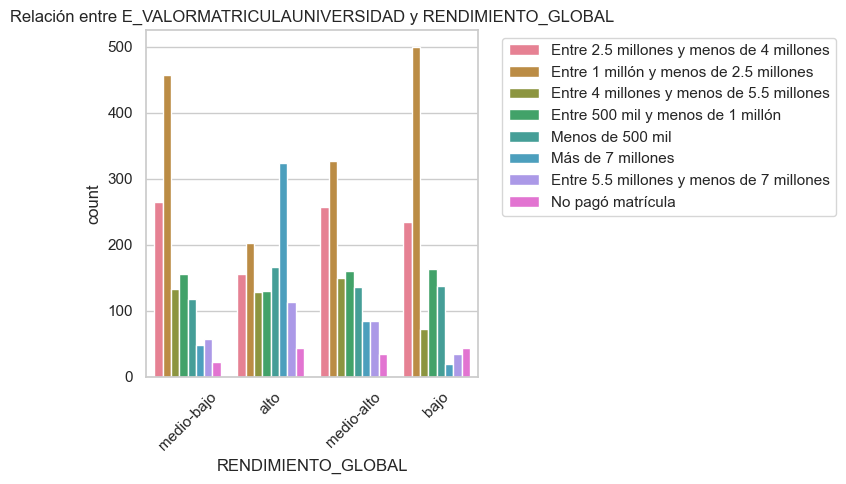

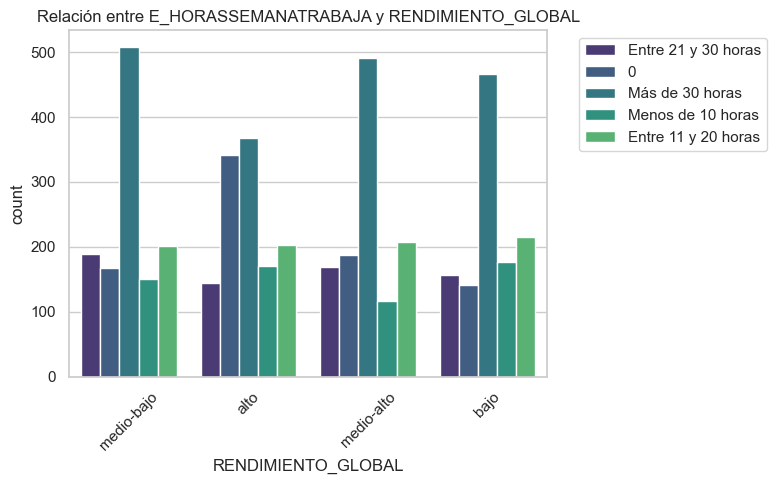

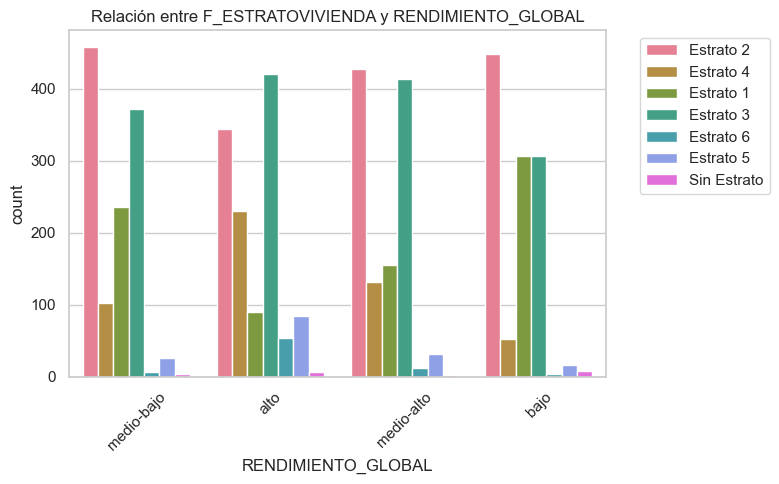

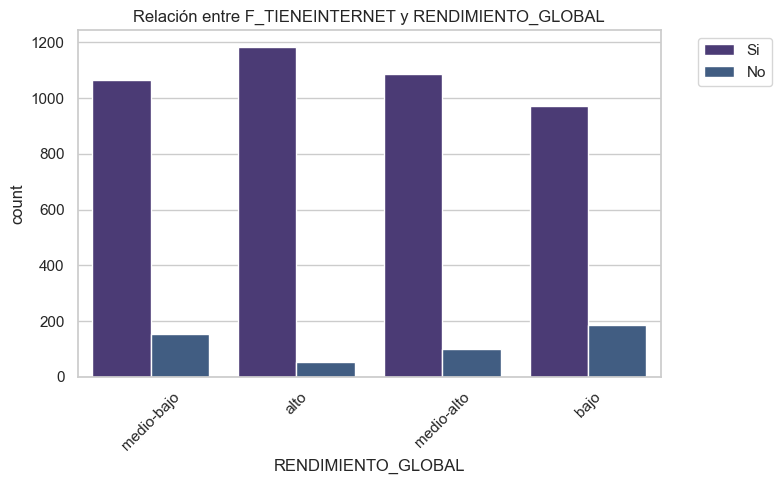

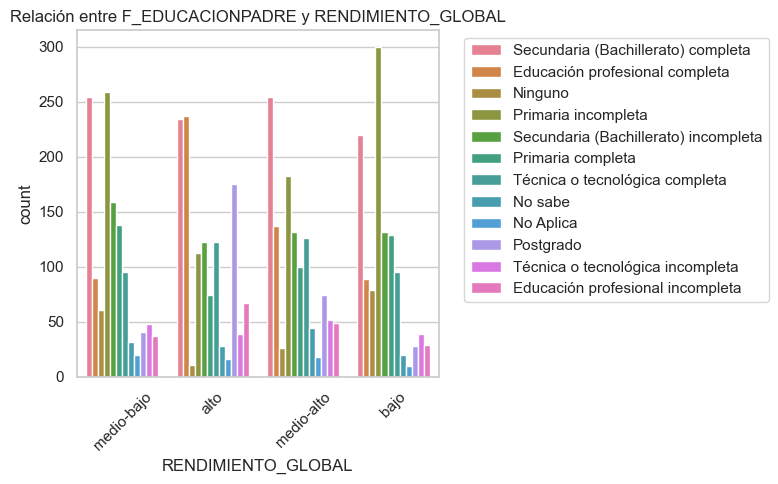

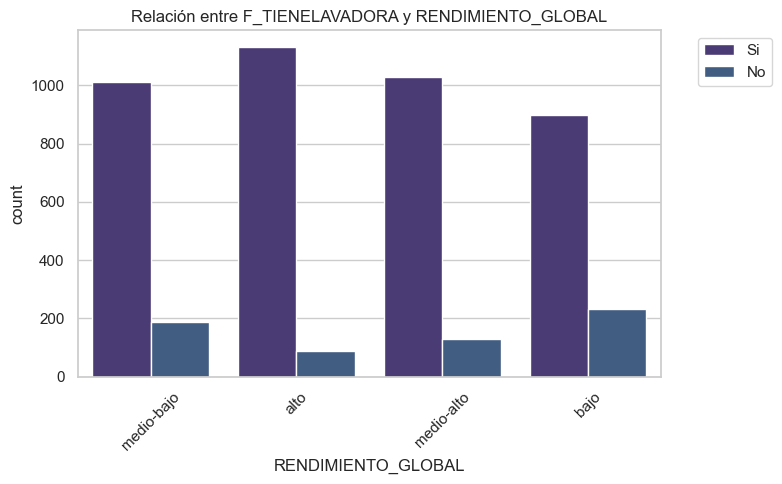

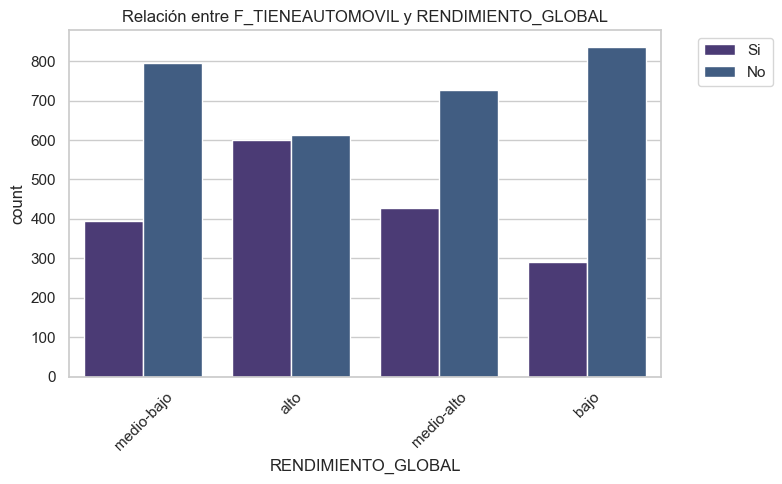

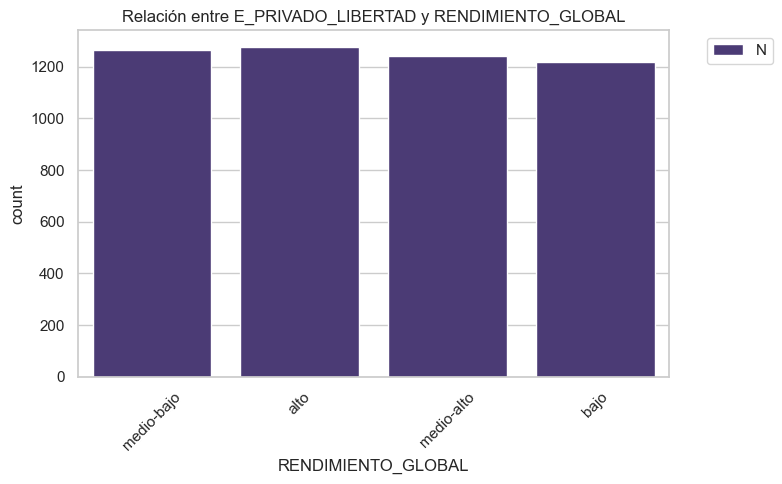

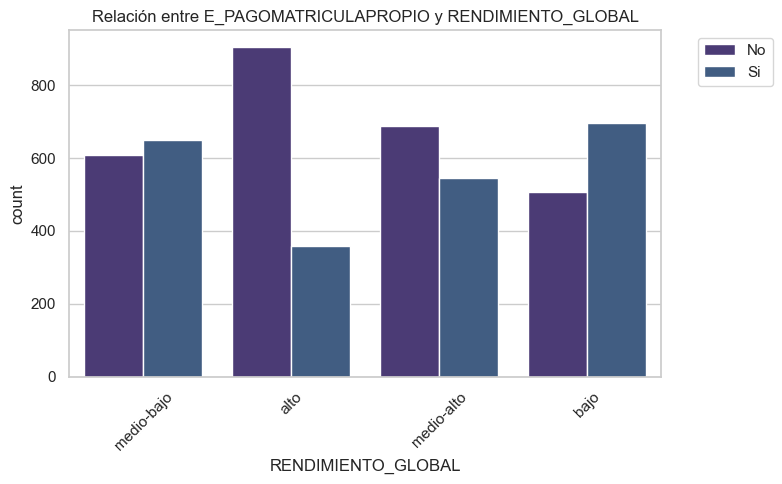

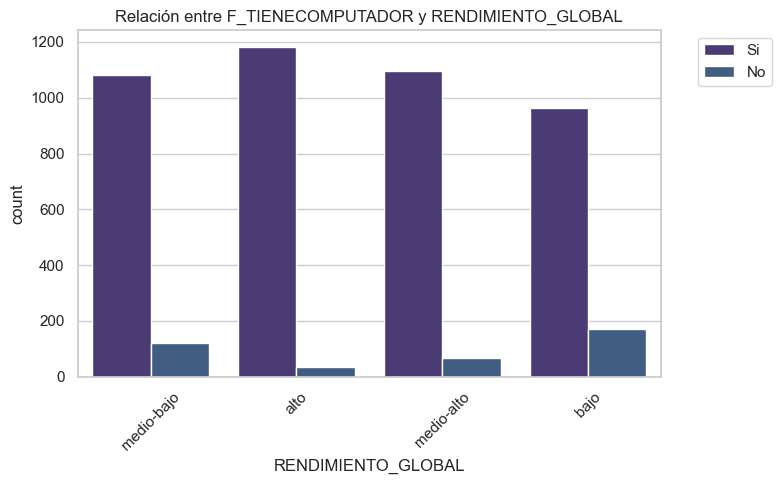

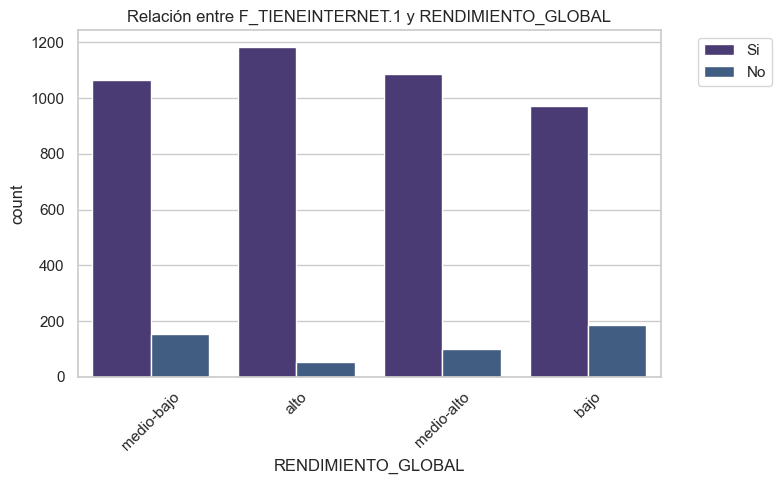

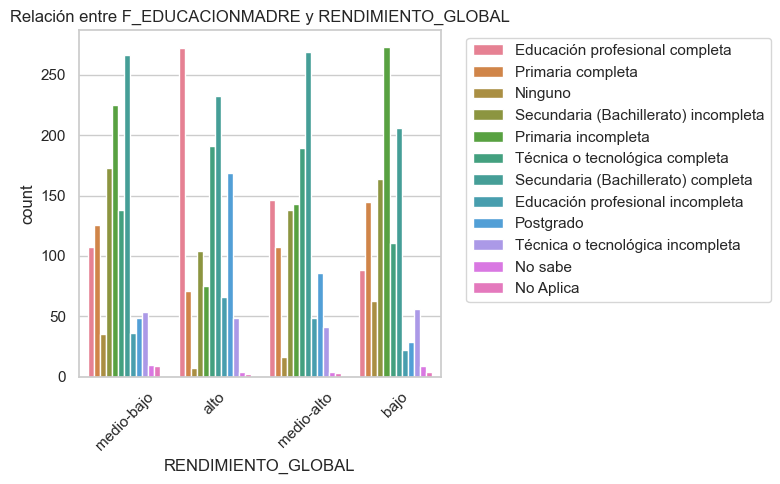

In [13]:

# Configuración general de estilo
sns.set(style="whitegrid", palette="viridis")

# Seleccionar solo las columnas de interés
cols = [
    "E_VALORMATRICULAUNIVERSIDAD",
    "E_HORASSEMANATRABAJA",
    "F_ESTRATOVIVIENDA",
    "F_TIENEINTERNET",
    "F_EDUCACIONPADRE",
    "F_TIENELAVADORA",
    "F_TIENEAUTOMOVIL",
    "E_PRIVADO_LIBERTAD",
    "E_PAGOMATRICULAPROPIO",
    "F_TIENECOMPUTADOR",
    "F_TIENEINTERNET.1",
    "F_EDUCACIONMADRE",
    "RENDIMIENTO_GLOBAL",
    "INDICADOR_1",
    "INDICADOR_2",
    "INDICADOR_3",
    "INDICADOR_4"
]
train = train[cols]

# Definir target y columnas predictoras
target = "RENDIMIENTO_GLOBAL"
features = [c for c in train.columns if c != target]

# Detectar tipo de variable
numeric_cols = train.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = train.select_dtypes(include=["object"]).columns

# (Opcional) Muestra aleatoria para evitar sobrecarga visual
train_sample = train.sample(5000, random_state=42) if len(train) > 5000 else train

# === 📈 Gráficos para variables numéricas ===
for col in numeric_cols:
    if col in features:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=target, y=col, data=train_sample)
        plt.title(f"Distribución de {col} según {target}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# === 📊 Gráficos para variables categóricas ===
for col in categorical_cols:
    if col in features:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=target, hue=col, data=train_sample)
        plt.title(f"Relación entre {col} y {target}")
        plt.xticks(rotation=45)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
